<a href="https://colab.research.google.com/github/rubengamarro/practicas-aprendizaje-supervisado/blob/main/Tarea_Evaluacion_de_modelos_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIO 1

**Apartado a**

In [318]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/ionosphere.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [319]:
#Preprocesamos los datos
X = df.loc[:, :33].values
y = df.loc[:, 34].values

In [320]:
#Codificamos las clases
from sklearn.preprocessing import LabelEncoder
mapeador_clase = LabelEncoder()
y = mapeador_clase.fit_transform(y)
np.unique(y)

array([0, 1])

In [321]:
from sklearn.model_selection import train_test_split

X_ent, X_test, y_ent, y_test = train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=10)

In [322]:
#Estandarizamos las muestras
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X_ent = escalador.fit_transform(X_ent)
X_test = escalador.transform(X_test)

**Apartado b**

In [323]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(random_state=1, solver='lbfgs', max_iter=200)
reg_log.fit(X_ent, y_ent)

LogisticRegression(max_iter=200, random_state=1)

In [324]:
#Definimos los tamaños de entrenamiento a evaluar
train_sizes = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [325]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
tamaños_conjEnt, rendimientos_ent, rendimientos_test =\
                learning_curve(estimator=reg_log,
                               X=X,
                               y=y,
                               train_sizes=train_sizes,
                               cv=12,
                               n_jobs=1)

In [326]:
#Calculamos medias y desviaciones típicas de rendimiento para cada pliegue:
media_ent = np.mean(rendimientos_ent, axis=1)
desvT_ent = np.std(rendimientos_ent, axis=1)
media_test = np.mean(rendimientos_test, axis=1)
desvT_test = np.std(rendimientos_test, axis=1)

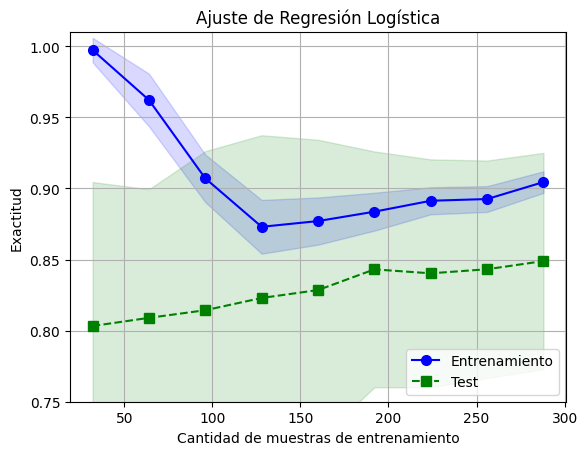

In [327]:
# Dibujamos rendimientos medios en función del tamaño del conjunto de
# entrenamiento:
plt.plot(tamaños_conjEnt, media_ent,
         color='blue', marker='o',
         markersize=7, label='Entrenamiento')
plt.plot(tamaños_conjEnt, media_test,
         color='green', linestyle='--',
         marker='s', markersize=7,
         label='Test')

# Pintamos desviaciones típicas:
plt.fill_between(tamaños_conjEnt,
                 media_ent + desvT_ent,
                 media_ent - desvT_ent,
                 alpha=0.15, color='blue')
plt.fill_between(tamaños_conjEnt,
                 media_test + desvT_test,
                 media_test - desvT_test,
                 alpha=0.15, color='green')

# Pintamos leyendas, etiquetas, ...:
plt.grid()
plt.title('Ajuste de Regresión Logística')
plt.xlabel('Cantidad de muestras de entrenamiento')
plt.ylabel('Exactitud')
plt.legend(loc='lower right')
plt.ylim([0.75, 1.01])
plt.show()

Como podemos ver en la curva de aprendizaje, la mejor configuración se consigue considerando entre el 60% y el 90% de muestras en entrenamiento. Del 60% al 90% aumenta un poco la exactitud en test y entrenamiento, pero ya queda a nuestro criterio si aumentar este porcentaje o no, ya que aumentaría el costo computacional.

Respecto al sobreajuste, podemos ver como se produce sobreajuste cuando tomamos un porcentaje pequeño de muestras de entrenamiento (10%-20%), ya que la exactitud en test es relativamente baja mientras que en entrenamiento es perfecta o casi perfecta. Esto se debe a que al tomar tan pocas muestras de entrenamiento el modelo de se ajusta demasiado a los pocos datos disponibles y no generaliza bien.

No parece haber subajuste, ya que las exactitudes son altas tanto en entrenamiento como test.

**Apartado c**

In [328]:
# Mostramos el nombre de los parámetros por los que ajustar en el estimador que
# vayamos a usar:

reg_log.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [329]:
from sklearn.model_selection import validation_curve

# Probaremos 16 valores de C, desde 10^-5 hasta 1
rango_param = np.logspace(-5, 0, 16)
rendimientos_ent, rendimientos_test = validation_curve(
                            reg_log,
                            X=X,
                            y=y,
                            param_name='C', #Sin pipe: param_name='gamma'
                            param_range=rango_param,
                            cv=10)

In [330]:
media_ent = np.mean(rendimientos_ent, axis=1)
desvT_ent = np.std(rendimientos_ent, axis=1)
media_test = np.mean(rendimientos_test, axis=1)
desvT_test = np.std(rendimientos_test, axis=1)

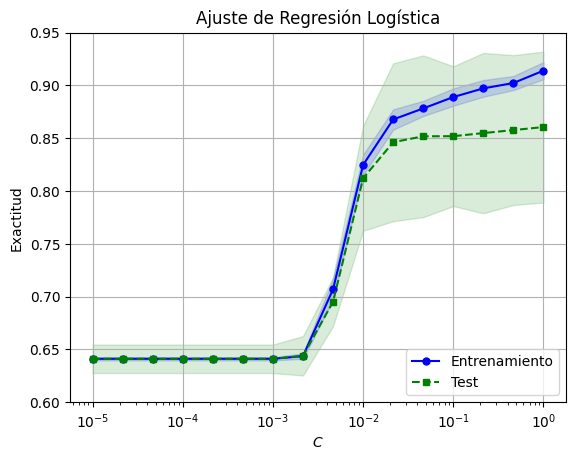

In [331]:
plt.plot(rango_param, media_ent,
         color='blue', marker='o',
         markersize=5, label='Entrenamiento')
plt.fill_between(rango_param, media_ent + desvT_ent,
                 media_ent - desvT_ent, alpha=0.15,
                 color='blue')
plt.plot(rango_param, media_test,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Test')
plt.fill_between(rango_param,
                 media_test + desvT_test,
                 media_test - desvT_test,
                 alpha=0.15, color='green')
plt.grid()

plt.legend(loc='lower right')
plt.xlabel(r"$C$")
plt.ylabel('Exactitud')
plt.title('Ajuste de Regresión Logística')
plt.xscale('log')
plt.ylim([0.6, 0.95])
plt.show()

Como podemos ver en la curva de validación, la mejor configuración para C se encuentra a partir del valor 10^{-15} hasta 1. Al igual que antes queda a criterio de cada uno aumentar el valor de C, ya que como podemos ver a partir de este valor el aumento de la exactitud en test es casi despreciable. Además, para valores más altos de C podría haber sobreajuste.

Para los valores de C que hemos estudiado no hay sobreajuste, pero si aumentaramos el valor de C seguramente habría sobreajuste, ya que la exactitud en entrenamiento sería casi perfecta mientras que la exactitud del test disminuiría considerablemente.

Podemos ver como para los valores muy bajos de C, la exactitud tanto en entrenamiento como test es baja, lo que indica un claro subajuste. Esto se debe a que un valor tan bajo de C indica más regularización, lo que significa que el modelo será más simple y generalizará tanto que no se ajustará bien a los datos, provocando subajuste.

#EJERCICIO 2

**Apartado a**

In [332]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/ionosphere.csv", header=None)

In [333]:
#Preprocesamos los datos
X = df.loc[:, :33].values
y = df.loc[:, 34].values

In [334]:
#Codificamos las clases
from sklearn.preprocessing import LabelEncoder
mapeador_clase = LabelEncoder()
y = mapeador_clase.fit_transform(y)
np.unique(y)

array([0, 1])

In [335]:
from sklearn.model_selection import train_test_split

X_ent, X_test, y_ent, y_test = train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=10)

In [336]:
#Estandarizamos las muestras
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X_ent_std = escalador.fit_transform(X_ent)
X_test_std = escalador.transform(X_test)

Para ver que modelo es mejor para este problema, utilizaremos la validación cruzada anidada.

Rendimiento de la regresión logística:

In [337]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', max_iter=200)
reg_log.fit(X_ent_std, y_ent)

LogisticRegression(max_iter=200, random_state=1)

In [338]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Bucle interno:
busqRejillaRL = GridSearchCV(estimator=reg_log,
                  param_grid=[{'C': [0.001, 0.01, 0.1, 1.0,
                                                         10.0, 100.0]}],
                  scoring='accuracy',
                  cv=2)

# Bucle externo:
redimientosRL = cross_val_score(busqRejillaRL, X, y,
                         scoring='accuracy', cv=10)
print('Exactitud RL: %.3f +/- %.3f' % (np.mean(redimientosRL),
                                      np.std(redimientosRL)))

Exactitud RL: 0.846 +/- 0.067


Rendimiento del KNN:

In [339]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_ent_std, y_ent)

KNeighborsClassifier()

In [340]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [341]:
# Bucle interno:
busqRejilla = GridSearchCV(estimator=knn,
                  param_grid=[{'n_neighbors': [2, 4, 10, 20, 50]}],
                  scoring='accuracy',
                  cv=2)

# Bucle externo:
redimientosKNN = cross_val_score(busqRejilla, X, y,
                         scoring='accuracy', cv=10)
print('Exactitud KNN: %.3f +/- %.3f' % (np.mean(redimientosKNN),
                                      np.std(redimientosKNN)))

Exactitud KNN: 0.886 +/- 0.054


Rendimiento de los bosques aleatorios:

In [342]:
from sklearn.ensemble import RandomForestClassifier

bosque = RandomForestClassifier(random_state=0)
bosque.fit(X_ent, y_ent)

RandomForestClassifier(random_state=0)

In [343]:
bosque.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [344]:
# Bucle interno:
busqRejilla = GridSearchCV(estimator=bosque,
                  param_grid=[{'n_estimators': [10, 50, 100, 200, 400]}],
                  scoring='accuracy',
                  cv=2)

# Bucle externo:
redimientosBosque = cross_val_score(busqRejilla, X, y,
                         scoring='accuracy', cv=10)
print('Exactitud bosques aleatorios: %.3f +/- %.3f' % (np.mean(redimientosBosque),
                                      np.std(redimientosBosque)))

Exactitud bosques aleatorios: 0.934 +/- 0.056


Visualizamos los rendimientos obtenidos mediante **diagramas de caja**:

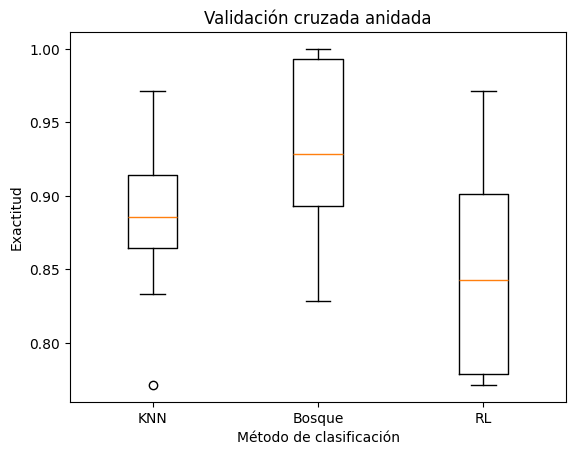

In [345]:
fig, ax = plt.subplots()

ax.boxplot([redimientosKNN, redimientosBosque, redimientosRL])

ax.set_xticklabels(["KNN", "Bosque", "RL"], fontsize=10)
ax.set_ylabel("Exactitud")
ax.set_xlabel("Método de clasificación")
ax.set_title('Validación cruzada anidada')
plt.show()

Como podemos ver, el mejor modelo será random forest.

**Apartado b**

En este apartado vamos a estudiar el rendimiento de dos hiperparámetros, para ello lo mejor es utilizar la búsqueda mediante rejilla.

In [346]:
rejilla_param = [{'n_estimators': [10, 50, 100, 200, 400],
               'max_depth': [5, 10, 15, 20, 30]}]
busqRejilla = GridSearchCV(estimator=bosque,
                  param_grid=rejilla_param,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)
busqRejilla = busqRejilla.fit(X_ent, y_ent)

print("Mejor configuración:", busqRejilla.best_params_)
print("Exactitud media de la mejor configuración: ", busqRejilla.best_score_)

Mejor configuración: {'max_depth': 5, 'n_estimators': 200}
Exactitud media de la mejor configuración:  0.9392857142857144


Dibujamos todos los rendimientos de las diferentes configuraciones probadas:

In [347]:
resultados = pd.DataFrame(busqRejilla.cv_results_)

# Ordenamos la matriz de resultados según el parámetro gamma para filas y
# C en las columnas
matriz_rendimientos = resultados.pivot(
            index="param_max_depth",
            columns="param_n_estimators",
            values="mean_test_score")
matriz_rendimientos

param_n_estimators,10,50,100,200,400
param_max_depth,,,,,
5,0.917857,0.932143,0.928571,0.939286,0.939286
10,0.925000,0.928571,0.932143,0.935714,0.935714
15,0.925000,0.932143,0.932143,0.935714,0.935714
20,0.925000,0.932143,0.932143,0.935714,0.935714
30,0.925000,0.932143,0.932143,0.935714,0.935714


Podemos ver que la mejor configuración se da con 200 árboles y profundidad 5, con una exactitud de 0.93928. Por otro lado, la peor configuración sería con 10 árboles y 5 de profundidad, con una exactitud de 0.9178.

Veámoslo con una matriz de colores:

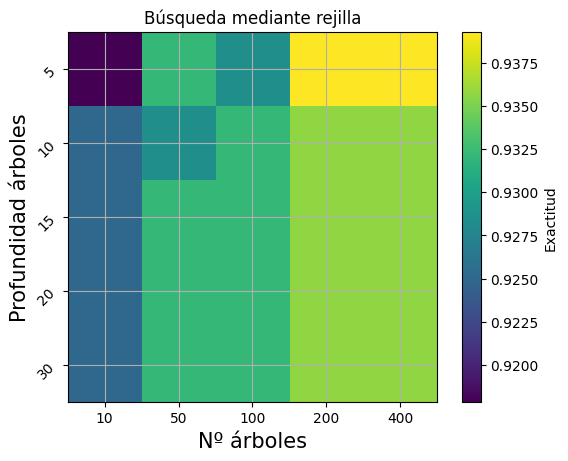

In [348]:
plt.imshow(matriz_rendimientos)
plt.yticks(ticks = np.arange(len([5, 10, 15, 20, 30])),
           labels=["{:d}".format(x) for x in [5, 10, 15, 20, 30]],
           rotation = 45)
plt.ylabel("Profundidad árboles", fontsize=15)

plt.xticks(np.arange(len([10, 50, 100, 200, 400])),
           labels=["{:d}".format(x) for x in [10, 50, 100, 200, 400]])
plt.xlabel(r"Nº árboles", fontsize=15)

plt.title('Búsqueda mediante rejilla')
plt.colorbar(label='Exactitud')
plt.grid()
plt.show()

Lo vemos ahora en 3D:

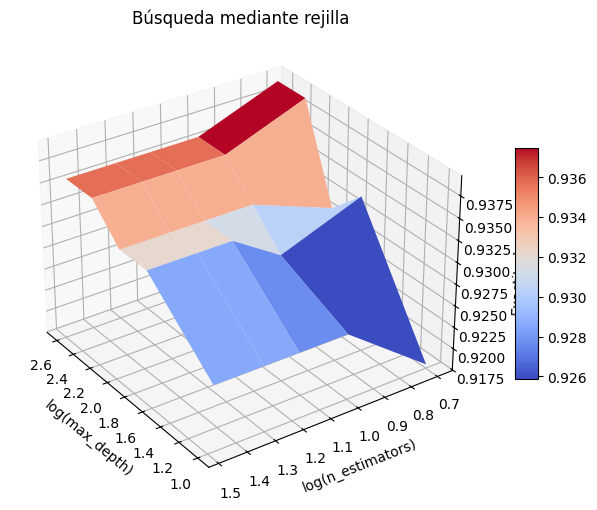

In [349]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(11, 6))

Cgrid, Ggrid = np.meshgrid([10, 50, 100, 200, 400], [5, 10, 15, 20, 30])

# Pintar la superficie
# OjO: usamos escala logarítmica en los ejes X e Y para visualizar mejor los
# resultados
surf = ax.plot_surface(np.log10(Cgrid), np.log10(Ggrid), matriz_rendimientos,
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

ax.set_title("Búsqueda mediante rejilla")
ax.set_xlabel("log(max_depth)")
ax.set_ylabel("log(n_estimators)")
ax.set_zlabel("Exactitud")
fig.colorbar(surf, shrink=0.5, aspect=10, orientation = 'vertical')

ax.view_init(None, 145)
plt.show()

Podemos ver que la exactitud es mayor cuando hay un gran número de árboles con poca profundidad.

#EJERCICIO 3

**Apartado a**

Tenemos que el peor método obtenido en el ejercicio anterior es la regresión logística.

In [351]:
#En primer lugar calculamos la mejor configuración de la regresión logística
busqRejillaRL = busqRejillaRL.fit(X_ent_std, y_ent)
print("Mejor configuración del peor método:", busqRejillaRL.best_params_)

Mejor configuración del peor método: {'C': 0.1}
